In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt  

import statsmodels.api as sm

/Users/joermotto/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<h1> 1 Active data exploration

In [5]:
bdata = load_boston()

boston =  pd.DataFrame(bdata.data, columns = bdata.feature_names)
boston['MEDV'] = bdata.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
#engineered features
boston['A1'] = boston['CRIM'] ** 2
boston['A2'] = boston['ZN'] * 100
boston['A3'] = boston['INDUS'] / boston['TAX']
boston['A4'] = boston['NOX'] ** 0.5
boston['A5'] = boston['RM'] * boston['RAD']
boston['A6'] = boston['DIS'] - boston['CRIM']
boston['A7'] = boston['RAD'] ** 3
boston['A8'] = boston['TAX'] / 100
boston['A9'] = boston['B'] ** boston['NOX']
boston['A10'] = boston['DIS'] + 10
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,0.000040,1800.0,0.007804,0.733485,6.575,4.08368,1.0,2.96,25.008661,14.0900
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,0.000746,0.0,0.029215,0.684836,12.842,4.93979,8.0,2.42,16.549369,14.9671
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,0.000745,0.0,0.029215,0.684836,14.370,4.93981,8.0,2.42,16.469559,14.9671
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,0.001048,0.0,0.009820,0.676757,20.994,6.02983,27.0,2.22,15.454504,16.0622
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,0.004768,0.0,0.009820,0.676757,21.441,5.99315,27.0,2.22,15.495156,16.0622


In [8]:
#bogus features
rows = len(boston['CRIM'])
boston['B1'] = np.random.uniform(low=0.5, high=13.3, size=(rows,))
boston['B2'] = np.round(np.random.uniform(low=25, high=1837, size=(rows,)), 2)
boston['B3'] = np.round(np.random.uniform(low=0.0, high=1.0, size=(rows,)))
boston['B4'] = np.random.random_sample((rows,))
boston['B5'] = np.random.ranf((rows,)) * 100
boston['B6'] = np.random.randint(5, 400 + 1, size=(rows,))
boston['B7'] = np.random.uniform(low=10, high=15, size=(rows,))
boston['B8'] = np.round(np.random.uniform(low=0, high=1, size=(rows,)), 2)
boston['B9'] = np.random.randint(10000, 100000 + 1, size=(rows,))
boston['B10'] = np.round(np.random.uniform(low=0, high=2, size=(rows,)), 2)

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,3.846124,763.84,1.0,0.388250,84.932515,336,10.139730,0.92,25133,0.18
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,7.342871,493.49,0.0,0.360466,99.806050,116,14.609051,0.61,75914,0.69
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,5.546224,425.28,1.0,0.316570,2.348952,198,12.756100,0.72,77539,1.92
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,9.356592,1085.91,0.0,0.400716,99.204920,399,13.850458,0.59,99553,0.85
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,6.670582,102.22,1.0,0.383938,50.254677,300,14.387629,0.08,47538,1.91


In [15]:
#summary table
summary = boston.describe().T
summary['corr'] = [0.0] * len(summary['count'])

for name in boston.columns:
    summary['corr'][name] = pd.Series.corr(boston[name], boston['MEDV'])

summary.head()

,count,mean,std,min,25%,50%,75%,max,corr
CRIM,506.0,3.593761,8.596783,0.00632,0.082045,0.25651,3.647423,88.9762,-0.385832
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000,0.360445
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400,-0.483725
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000,0.175260
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710,-0.427321


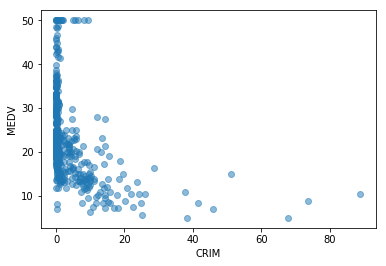

In [25]:
plt.plot(boston[['CRIM']], boston[['MEDV']], 'o', alpha=0.5)
plt.ylabel('MEDV')
plt.xlabel('CRIM')

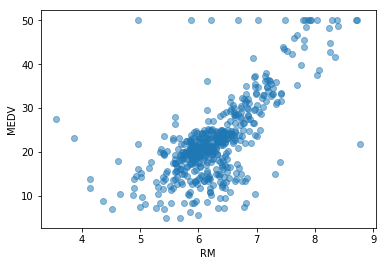

In [26]:
plt.plot(boston[['RM']], boston[['MEDV']], 'o', alpha=0.5)
plt.ylabel('MEDV')
plt.xlabel('RM')

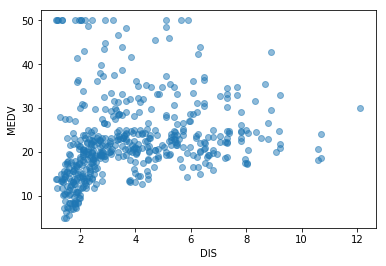

In [27]:
plt.plot(boston[['DIS']], boston[['MEDV']], 'o', alpha=0.5)
plt.ylabel('MEDV')
plt.xlabel('DIS')

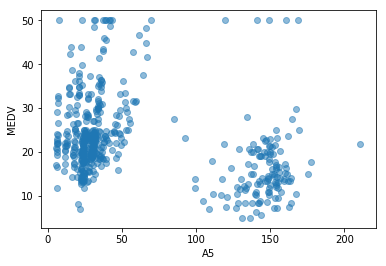

In [28]:
plt.plot(boston[['A5']], boston[['MEDV']], 'o', alpha=0.5)
plt.ylabel('MEDV')
plt.xlabel('A5')

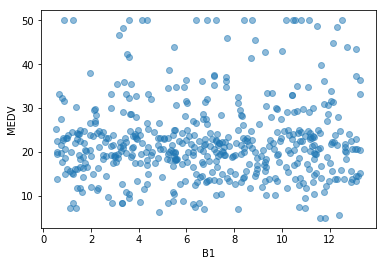

In [29]:
plt.plot(boston[['B1']], boston[['MEDV']], 'o', alpha=0.5)
plt.ylabel('MEDV')
plt.xlabel('B1')

<h1> 2 Simple Models

<h3> Loss Function

In [30]:
#loss function
def MSE(lm, x, y):
    return np.square(y - lm.predict(x)).mean()

<h3> Few Simple Regressions

In [31]:
x = boston[['CRIM']]
y = boston['MEDV']

lm = LinearRegression()
lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
# CRIM 10-fold MSE Score
scores = cross_val_score(lm, x, y, cv=10, scoring=MSE)
print(scores)

print('MSE score: ', scores.mean())

[  47.5065087    26.96062463   45.79534319  167.8967778    89.59115588
  147.28144563   21.26305107  135.21275971   59.670526     35.70121519]
CRIM MSE score:  77.6879407813


In [35]:
# 10 variable MSE Score
x = boston[['CRIM', 'ZN', 'INDUS', 'NOX', 'A1', 'A2', 'A3', 'B1', 'B2', 'B3']]
y = boston['MEDV']

lm = LinearRegression()
lm.fit(x, y)

scores = cross_val_score(lm, x, y, cv=10, scoring=MSE)
print(scores)

print('MSE score: ', scores.mean())

[  52.5966915    33.49043199   21.0157655   141.13094906   81.66114742
  108.90959896   40.28860991  128.33526614   27.8732405    20.46499797]
MSE score:  65.5766698945


In [38]:
# all variables MSE score
x = boston[boston.columns]
x = x.drop(['MEDV'], axis=1)
y = boston['MEDV']


lm = LinearRegression()
lm.fit(x, y)

scores = cross_val_score(lm, x, y, cv=10, scoring=MSE)
print(scores)

print('MSE score: ', scores.mean())

[  11.13001528   10.99606085   59.31089686   24.36437722   22.55320331
   12.33549375    7.41351599  120.16596364   18.51162405   12.61971435]
MSE score:  29.9400865303


Using all features resulted in a MSE score of 29.94. This performs best of all the models, because the closer MSE is to zero, the more accurate the estimator predicts observations.

<h1> 3 Find the Best Model

<h3> Can we evaluate all models

In [40]:
import math
print('# of possible models: ', math.factorial(33))

# of possible models:  8683317618811886495518194401280000000


In [45]:
import time
allFeatures = boston[boston.columns].drop(['MEDV'], axis=1)

i = 0
iterations = 250

startTime = time.time()

while i < iterations :
    rangeFeatures = np.arange(0, 33)
    shuffledOrder = np.random.choice(rangeFeatures, size=33, replace=False)
    numFeatures = np.random.randint(low=1, high=34)
    pickedFeatures = shuffledOrder[0:numFeatures]

    x = allFeatures.iloc[:, pickedFeatures]
    y = boston['MEDV']

    lm = LinearRegression()
    lm.fit(x, y)

    scores = cross_val_score(lm, x, y, cv=10, scoring=MSE)
    scoresMean = scores.mean()
    
    i = i + 1
endTime = time.time()
print("Total time taken: ", endTime - startTime)

Total time taken:  6.082586765289307


In [46]:
print('Years it will take ', ((6/250) * math.factorial(33)) / 31540000)

Years it will take  6.607470604042019e+27


It took around 6 seconds to go through 250 iterations and to complete the whole process would take 6.607470604042019e+27 years for my computational power

<h3> Forward Selection

In [47]:
allFeatures = boston[boston.columns].drop(['MEDV'], axis=1)
featureNames = allFeatures.columns

i = 0
maxFeatures = 33
bestMean = 0
bestFeature = ''

while i < maxFeatures :
    x = allFeatures.iloc[:, i].values.reshape(-1, 1)
    y = boston['MEDV']
    
    lm = LinearRegression()
    lm.fit(x, y)
    
    scores = cross_val_score(lm, x, y, cv=10, scoring=MSE)
    scoresMean = scores.mean()
    
    if (i == 0):
        bestMean = scoresMean
        bestFeature = featureNames[i]
    else:
        if (scoresMean < bestMean):
            bestMean = scoresMean
            bestFeature = featureNames[i]

    i = i + 1

print('Lowest Loss: ', bestMean)
print('Feature: ', bestFeature)

Lowest Loss:  41.8289580722
Feature:  LSTAT


In [48]:
allFeatures = boston[boston.columns].drop(['MEDV'], axis=1)
featureNames = allFeatures.columns

i = 1
maxFeatures = 33
bestMean = 0
numFeatures = 0

while i < maxFeatures :    
    x = allFeatures.iloc[:, 0:i]
    y = boston['MEDV']

    lm = LinearRegression()
    lm.fit(x, y)

    scores = cross_val_score(lm, x, y, cv=10, scoring=MSE)
    scoresMean = scores.mean()
    
    if (i == 1):
        bestMean = scoresMean
        numFeatures = i + 1
    else:
        if (scoresMean < bestMean):
            bestMean = scoresMean
            numFeatures = i + 1
    
    i = i + 1

print('Lowest loss: ', bestMean)
print('Number of features: ', numFeatures)

Lowest loss:  29.7458365227
Number of features:  25


<h1> 4 Principle Components

<h3> Raw Features

In [49]:
x = boston[boston.columns].drop(['MEDV'], axis=1)
featureNames = x.columns

m = PCA().fit(x)

pcaSummary = pd.DataFrame(m.explained_variance_, columns = ['explained_variance'], index=featureNames)
pcaSummary['variance_ratio'] = m.explained_variance_ratio_
pcaSummary['cum_variance_ratio'] = np.cumsum(m.explained_variance_ratio_)
pcaSummary['singular_values'] = m.singular_values_

pcaSummary.head()

,explained_variance,variance_ratio,cum_variance_ratio,singular_values
CRIM,7.022448e+08,0.943211,0.943211,595511.217503
ZN,3.685518e+07,0.049502,0.992712,136425.314150
INDUS,4.893220e+06,0.006572,0.999284,49709.920860
CHAS,2.659231e+05,0.000357,0.999641,11588.407080
NOX,2.403140e+05,0.000323,0.999964,11016.286244


In [51]:
# Rotate data original features
originalX = pd.DataFrame(bdata.data, columns = bdata.feature_names)
featureNames = originalX.columns

m = PCA().fit(originalX)

pcaSummary = pd.DataFrame(m.explained_variance_, columns = ['explained_variance'], index=featureNames)
pcaSummary['variance_ratio'] = m.explained_variance_ratio_
pcaSummary['cum_variance_ratio'] = np.cumsum(m.explained_variance_ratio_)
pcaSummary['singular_values'] = m.singular_values_

pcaSummary.head()

,explained_variance,variance_ratio,cum_variance_ratio,singular_values
CRIM,30889.518211,0.805815,0.805815,3949.583104
ZN,6250.274010,0.163051,0.968865,1776.622744
INDUS,818.365244,0.021349,0.990214,642.864253
CHAS,266.683023,0.006957,0.997171,366.980826
NOX,50.134704,0.001308,0.998479,159.116390


In [56]:
i = 0
maxFeatures = 13
bestMean = 0
feature = 0

while i < maxFeatures :    
    x = dataRot[:, i].reshape(-1,1)
    y = boston['MEDV']

    lm = LinearRegression()
    lm.fit(x, y)
    
    scores = cross_val_score(lm, x, y, cv=10, scoring=MSE)
    scoresMean = scores.mean()
    
    if (i == 0):
        bestMean = scoresMean
        feature = i
    else:
        if (scoresMean < bestMean):
            bestMean = scoresMean
            feature = i
    
    i = i + 1

print('Lowest loss: ', bestMean)
print('Best feature: ', featureNames[feature])

Lowest loss:  70.0810877952
Best feature:  CRIM


Variance by variable:
 [  3.08284717e+04   6.23792169e+03   8.16747922e+02   2.66155981e+02
   5.00356236e+01   2.78416349e+01   1.60690855e+01   9.51546794e+00
   3.26682587e+00   1.17875328e+00   2.54601972e-01   5.99823841e-02
   3.04748580e-03]


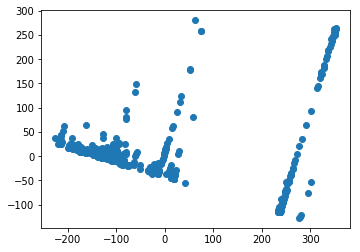

In [57]:
originalX = pd.DataFrame(bdata.data, columns = bdata.feature_names)

fig = plt.gcf()

dataRot = PCA().fit_transform(originalX)
plt.scatter(dataRot[:,0], dataRot[:,1])
plt.axes().set_aspect("equal")

print("Variance by variable:\n", np.apply_along_axis(np.var, 0, dataRot))

<h3> PCA on Normalized Data

In [58]:
def normalize(x):
    return (x - np.mean(x)) / np.std(x)

In [59]:
# Normalized all variables

originalX2 = pd.DataFrame(bdata.data, columns = bdata.feature_names)

for name in originalX2.columns:
    originalX2[name] = normalize(originalX2[name])

originalX2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


,explained_variance,variance_ratio,cum_variance_ratio,singular_values
CRIM,6.134779,0.470973,0.470973,55.660249
ZN,1.434899,0.110159,0.581132,26.918842
INDUS,1.243621,0.095474,0.676606,25.060496
CHAS,0.859498,0.065985,0.742591,20.833777
NOX,0.836219,0.064197,0.806788,20.549708
RM,0.660957,0.050742,0.857531,18.269734
AGE,0.540085,0.041463,0.898993,16.514928
DIS,0.397329,0.030503,0.929497,14.165145
RAD,0.277984,0.021341,0.950838,11.848295
TAX,0.220696,0.016943,0.967781,10.557057


Variance by variable:
 [ 6.12265476  1.43206335  1.24116299  0.85779892  0.83456618  0.65965056
  0.53901749  0.39654415  0.27743495  0.22025981  0.18616388  0.16916744
  0.06351553]


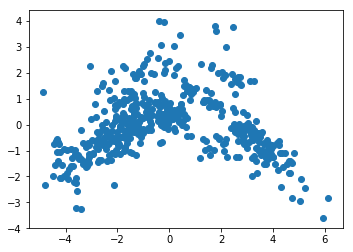

In [60]:
featureNames = originalX2.columns

m = PCA().fit(originalX2)

pcaSummary = pd.DataFrame(m.explained_variance_, columns = ['explained_variance'], index=featureNames)
pcaSummary['variance_ratio'] = m.explained_variance_ratio_
pcaSummary['cum_variance_ratio'] = np.cumsum(m.explained_variance_ratio_)
pcaSummary['singular_values'] = m.singular_values_

display(pcaSummary)

fig = plt.gcf()

dataRot = PCA().fit_transform(originalX2)
plt.scatter(dataRot[:,0], dataRot[:,1])
plt.axes().set_aspect("equal")

print("Variance by variable:\n", np.apply_along_axis(np.var, 0, dataRot))

The most precise was the PCA on Raw Data.

The most compact was the PCA on Normalized Data.

The easiest to do was the PCA on Normalized Data, due to less lines to write and functions from libraries.

The most straightforward interpretation can be depicted from the PCA on Raw Data. For every feature, you can get the explained variance and cumulative variance and singular values. Explaining the normalized data is hard to do and not as straight forward to interpret. 